# Taxas de Desemprego (OECD)

Faça o download dos dados de desemprego mantidos pela OECD (donwload full indicator data (.csv) em
https://data.oecd.org/unemp/unemployment-rate.htm) e copie o arquivo .csv para um subdiretório data/
abaixo do diretório do script.

In [2]:
# Download feito manualmente pelo link disponibilizado
# O arquivo foi renomeado para "unemployment.csv" e salvo na pasta "data/" como especificado

# Leitura Inicial dos Dados

Crie um script que leia os dados do arquivo CSV, se certificando que os valores alfanuméricos sejam tratados
como string e não factor.

In [1]:
# Puxando os dados do arquivo e verificando início e fim da tabela
desempregoDados <- read.csv("data/unemployment.csv", na.strings="") # Obs.: Tratei campos vazios como NA
head(desempregoDados)
tail(desempregoDados)

,ï..LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag.Codes
1,AUS,UNEMP,TOT,PC_LF,A,1967,1.875,NA
2,AUS,UNEMP,TOT,PC_LF,A,1968,1.85,NA
3,AUS,UNEMP,TOT,PC_LF,A,1969,1.8,NA
4,AUS,UNEMP,TOT,PC_LF,A,1970,1.625,NA
5,AUS,UNEMP,TOT,PC_LF,A,1971,1.925,NA
6,AUS,UNEMP,TOT,PC_LF,A,1972,2.625,NA


,ï..LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag.Codes
9118,COL,UNEMP,TOT,PC_LF,M,2015-09,9.374468,NA
9119,COL,UNEMP,TOT,PC_LF,M,2015-10,9.276985,NA
9120,COL,UNEMP,TOT,PC_LF,M,2015-11,8.494882,NA
9121,COL,UNEMP,TOT,PC_LF,M,2015-12,9.099595,NA
9122,COL,UNEMP,TOT,PC_LF,M,2016-01,9.56433,NA
9123,COL,UNEMP,TOT,PC_LF,M,2016-02,8.995986,NA


In [2]:
# Mudando os nomes das colunas para facilitar leitura
names(desempregoDados) <- c("Location", "Indicator", "Subject", "Measure", "Frequency", "Time", "Value", "Codes")
names(desempregoDados)

[1] "Location"  "Indicator" "Subject"   "Measure"   "Frequency" "Time"     
[7] "Value"     "Codes"

In [3]:
# Verificando tipo dos dados de cada coluna
class(desempregoDados$Location)
class(desempregoDados$Indicator)
class(desempregoDados$Subject)
class(desempregoDados$Measure)
class(desempregoDados$Frequency)
class(desempregoDados$Time)
class(desempregoDados$Value)
class(desempregoDados$Codes)

[1] "factor"

[1] "factor"

[1] "factor"

[1] "factor"

[1] "factor"

[1] "factor"

[1] "numeric"

[1] "factor"

In [4]:
# Passando os tipos para character usando lapply e testando o resultado
# Obs.: lapply me retorna uma lista, mas faço o valor retornado ser um data.frame e considero falso strings passarem a ser factor
desempregoDados <- data.frame(lapply(desempregoDados, as.character), stringsAsFactors=FALSE)
desempregoDados <- transform(desempregoDados, Value = as.numeric(Value)) # Obs.: Deixo Value como numeric

class(desempregoDados)
class(desempregoDados$Location)
class(desempregoDados$Indicator)
class(desempregoDados$Subject)
class(desempregoDados$Measure)
class(desempregoDados$Frequency)
class(desempregoDados$Time)
class(desempregoDados$Value)
class(desempregoDados$Codes)

[1] "data.frame"

[1] "character"

[1] "character"

[1] "character"

[1] "character"

[1] "character"

[1] "character"

[1] "numeric"

[1] "character"

# Examinando os Dados

Examine os dados lidos e responda:

a) Quantos registros e atributos há?

b) Quantos países/regiões estão incluídos nos dados?

In [5]:
# A quantidade de registros equivale à quantidade de linhas do data frame
# A quantidade de atributos equivale à quantidade de colunas do data frame
# Logo, basta saber as dimensões para responder a letra a
dim(desempregoDados)

# Pelo output abaixo, são 9123 registros e 8 atributos

[1] 9123    8

In [6]:
# Para responder a letra b, a coluna Location é verificada usando unique para obter os dados registrados na coluna sem repetir
# dados similares
locais <- unique(desempregoDados$Location)
locais

[1] "AUS"  "AUT"  "BEL"  "CAN"  "CZE"  "DNK"  "FIN"  "FRA"  "DEU"  "GRC" 
[11] "HUN"  "ISL"  "IRL"  "ITA"  "JPN"  "KOR"  "LUX"  "MEX"  "NLD"  "NZL" 
[21] "NOR"  "POL"  "PRT"  "SVK"  "ESP"  "SWE"  "CHE"  "TUR"  "GBR"  "USA" 
[31] "BRA"  "CHL"  "EST"  "IDN"  "ISR"  "RUS"  "SVN"  "ZAF"  "EU28" "OECD"
[41] "EA19" "COL"

In [7]:
# Uso length para saber quantos dados únicos estão registrados na coluna Location
length(locais)

# Pelo output abaixo, são 42 países/regiões incluídos nos dados

[1] 42

# Extraindo Subconjuntos de Dados

Extraia o subconjunto dos dados relacionados apenas aos indicadores anuais (excluindo os indicadores
trimestrais e mensais) e responda as seguintes perguntas. (Obs: Certifique-se de que a coluna relacionada às
datas seja da class numeric.)

a) Quantos registros permanecem?

b) De quantos anos há dados?

c) Qual é o período de tempo (primeiro ano e último ano)?

d) Qual é o primeiro e o último ano de que se tem dados de cada país? Elabore uma tabela com as colunas
location, first.year, last.year, ordenada por first.year e depois por location. Para exibir a
tabela, utilize a função kable do pacote knitr.

e) Desde o início da coleta dos dados em cada país, há algum ano de que não se tenha dados?

f) Desde qual ano a OECD tem dados de desemprego do Brasil?

g) De quantos e quais anos se tem dados de desemprego do Brasil?

In [8]:
# Antes, verifico os dados referentes à coluna Time para saber como separar os dados
unique(desempregoDados$Time)

# Pelo output abaixo, os dados que não contém indicadores anuais possuem o caracter "-" em comum

[1] "1967"    "1968"    "1969"    "1970"    "1971"    "1972"    "1973"   
   [8] "1974"    "1975"    "1976"    "1977"    "1978"    "1979"    "1980"   
  [15] "1981"    "1982"    "1983"    "1984"    "1985"    "1986"    "1987"   
  [22] "1988"    "1989"    "1990"    "1991"    "1992"    "1993"    "1994"   
  [29] "1995"    "1996"    "1997"    "1998"    "1999"    "2000"    "2001"   
  [36] "2002"    "2003"    "2004"    "2005"    "2006"    "2007"    "2008"   
  [43] "2009"    "2010"    "2011"    "2012"    "2013"    "2014"    "2015"   
  [50] "1955"    "1956"    "1957"    "1958"    "1959"    "1960"    "1961"   
  [57] "1962"    "1963"    "1964"    "1965"    "1966"    "1966-Q3" "1966-Q4"
  [64] "1967-Q1" "1967-Q2" "1967-Q3" "1967-Q4" "1968-Q1" "1968-Q2" "1968-Q3"
  [71] "1968-Q4" "1969-Q1" "1969-Q2" "1969-Q3" "1969-Q4" "1970-Q1" "1970-Q2"
  [78] "1970-Q3" "1970-Q4" "1971-Q1" "1971-Q2" "1971-Q3" "1971-Q4" "1972-Q1"
  [85] "1972-Q2" "1972-Q3" "1972-Q4" "1973-Q1" "1973-Q2" "1973-Q3" "1973-Q4"
  [92] "1974-Q1" "1974-Q2" "1974-Q3" "1974-Q4" "1975-Q1" "1975-Q2" "1975-Q3"
  [99] "1975-Q4" "1976-Q1" "1976-Q2" "1976-Q3" "1976-Q4" "1977-Q1" "1977-Q2"
 [106] "1977-Q3" "1977-Q4" "1978-Q1" "1978-Q2" "1978-Q3" "1978-Q4" "1979-Q1"
 [113] "1979-Q2" "1979-Q3" "1979-Q4" "1980-Q1" "1980-Q2" "1980-Q3" "1980-Q4"
 [120] "1981-Q1" "1981-Q2" "1981-Q3" "1981-Q4" "1982-Q1" "1982-Q2" "1982-Q3"
 [127] "1982-Q4" "1983-Q1" "1983-Q2" "1983-Q3" "1983-Q4" "1984-Q1" "1984-Q2"
 [134] "1984-Q3" "1984-Q4" "1985-Q1" "1985-Q2" "1985-Q3" "1985-Q4" "1986-Q1"
 [141] "1986-Q2" "1986-Q3" "1986-Q4" "1987-Q1" "1987-Q2" "1987-Q3" "1987-Q4"
 [148] "1988-Q1" "1988-Q2" "1988-Q3" "1988-Q4" "1989-Q1" "1989-Q2" "1989-Q3"
 [155] "1989-Q4" "1990-Q1" "1990-Q2" "1990-Q3" "1990-Q4" "1991-Q1" "1991-Q2"
 [162] "1991-Q3" "1991-Q4" "1992-Q1" "1992-Q2" "1992-Q3" "1992-Q4" "1993-Q1"
 [169] "1993-Q2" "1993-Q3" "1993-Q4" "1994-Q1" "1994-Q2" "1994-Q3" "1994-Q4"
 [176] "1995-Q1" "1995-Q2" "1995-Q3" "1995-Q4" "1996-Q1" "1996-Q2" "1996-Q3"
 [183] "1996-Q4" "1997-Q1" "1997-Q2" "1997-Q3" "1997-Q4" "1998-Q1" "1998-Q2"
 [190] "1998-Q3" "1998-Q4" "1999-Q1" "1999-Q2" "1999-Q3" "1999-Q4" "2000-Q1"
 [197] "2000-Q2" "2000-Q3" "2000-Q4" "2001-Q1" "2001-Q2" "2001-Q3" "2001-Q4"
 [204] "2002-Q1" "2002-Q2" "2002-Q3" "2002-Q4" "2003-Q1" "2003-Q2" "2003-Q3"
 [211] "2003-Q4" "2004-Q1" "2004-Q2" "2004-Q3" "2004-Q4" "2005-Q1" "2005-Q2"
 [218] "2005-Q3" "2005-Q4" "2006-Q1" "2006-Q2" "2006-Q3" "2006-Q4" "2007-Q1"
 [225] "2007-Q2" "2007-Q3" "2007-Q4" "2008-Q1" "2008-Q2" "2008-Q3" "2008-Q4"
 [232] "2009-Q1" "2009-Q2" "2009-Q3" "2009-Q4" "2010-Q1" "2010-Q2" "2010-Q3"
 [239] "2010-Q4" "2011-Q1" "2011-Q2" "2011-Q3" "2011-Q4" "2012-Q1" "2012-Q2"
 [246] "2012-Q3" "2012-Q4" "2013-Q1" "2013-Q2" "2013-Q3" "2013-Q4" "2014-Q1"
 [253] "2014-Q2" "2014-Q3" "2014-Q4" "2015-Q1" "2015-Q2" "2015-Q3" "2015-Q4"
 [260] "2016-Q1" "1955-Q1" "1955-Q2" "1955-Q3" "1955-Q4" "1956-Q1" "1956-Q2"
 [267] "1956-Q3" "1956-Q4" "1957-Q1" "1957-Q2" "1957-Q3" "1957-Q4" "1958-Q1"
 [274] "1958-Q2" "1958-Q3" "1958-Q4" "1959-Q1" "1959-Q2" "1959-Q3" "1959-Q4"
 [281] "1960-Q1" "1960-Q2" "1960-Q3" "1960-Q4" "1961-Q1" "1961-Q2" "1961-Q3"
 [288] "1961-Q4" "1962-Q1" "1962-Q2" "1962-Q3" "1962-Q4" "1963-Q1" "1963-Q2"
 [295] "1963-Q3" "1963-Q4" "1964-Q1" "1964-Q2" "1964-Q3" "1964-Q4" "1965-Q1"
 [302] "1965-Q2" "1965-Q3" "1965-Q4" "1966-Q1" "1966-Q2" "1978-02" "1978-03"
 [309] "1978-04" "1978-05" "1978-06" "1978-07" "1978-08" "1978-09" "1978-10"
 [316] "1978-11" "1978-12" "1979-01" "1979-02" "1979-03" "1979-04" "1979-05"
 [323] "1979-06" "1979-07" "1979-08" "1979-09" "1979-10" "1979-11" "1979-12"
 [330] "1980-01" "1980-02" "1980-03" "1980-04" "1980-05" "1980-06" "1980-07"
 [337] "1980-08" "1980-09" "1980-10" "1980-11" "1980-12" "1981-01" "1981-02"
 [344] "1981-03" "1981-04" "1981-05" "1981-06" "1981-07" "1981-08" "1981-09"
 [351] "1981-10" "1981-11" "1981-12" "1982-01" "1982-02" "1982-03" "1982-04"
 [358] "1982-05" "1982-06" "1982-07" "1982-08" "1982-09" "1982-10" "1982-11"

In [9]:
# Para gerar o subconjunto, uso subset
# Para excluir registros contendo tempos que não sejam puramente anuais, uso grepl para ignorar strings contendo o caracter "-"
ddAnos <- subset(desempregoDados, !grepl("-", desempregoDados$Time))

# Verifico que a coluna Time contenha apenas o desejado
unique(ddAnos$Time)

[1] "1967" "1968" "1969" "1970" "1971" "1972" "1973" "1974" "1975" "1976"
[11] "1977" "1978" "1979" "1980" "1981" "1982" "1983" "1984" "1985" "1986"
[21] "1987" "1988" "1989" "1990" "1991" "1992" "1993" "1994" "1995" "1996"
[31] "1997" "1998" "1999" "2000" "2001" "2002" "2003" "2004" "2005" "2006"
[41] "2007" "2008" "2009" "2010" "2011" "2012" "2013" "2014" "2015" "1955"
[51] "1956" "1957" "1958" "1959" "1960" "1961" "1962" "1963" "1964" "1965"
[61] "1966"

In [10]:
# Os dados da coluna Time são do tipo character, preciso transformar para numeric
class(ddAnos$Time)

[1] "character"

In [11]:
# Uso transform para transformar apenas os dados da coluna Time para numeric e verifico
ddAnos <- transform(ddAnos, Time = as.numeric(Time))
class(ddAnos$Time)

[1] "numeric"

In [45]:
# Para responder a letra a, vejo a quantidade de linhas do subconjunto
nrow(ddAnos)

# Pelo output abaixo, são 1022 registros permanecentes

[1] 1022

In [13]:
# Para responder a letra b, uso unique e length na coluna Time
length(unique(ddAnos$Time))

# Pelo output abaixo, são 61 anos dos quais há dados no subconjunto

[1] 61

In [14]:
# Para responder a letra c, uso min e max na coluna Time do subconjunto
# min irá me retornar o menor valor
anoMin <- min(ddAnos$Time)
anoMin

# max irá me retornar o maior valor
anoMax <- max(ddAnos$Time)
anoMax

# Pelo output abaixo, o período de tempo vai de 1955 a 2015

[1] 1955

[1] 2015

In [1]:
# Instalando o pacote knitr
# install.packages("knitr", repos='http://cran.us.r-project.org', lib="C:/RPackages")
# Obs.: Linha de código comentada para não dar problema de execução em outras máquinas

also installing the dependencies 'mime', 'evaluate', 'formatR', 'highr', 'markdown', 'yaml'



package 'mime' successfully unpacked and MD5 sums checked
package 'evaluate' successfully unpacked and MD5 sums checked
package 'formatR' successfully unpacked and MD5 sums checked
package 'highr' successfully unpacked and MD5 sums checked
package 'markdown' successfully unpacked and MD5 sums checked
package 'yaml' successfully unpacked and MD5 sums checked
package 'knitr' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\NinoFabrizio\AppData\Local\Temp\RtmpKO5R9o\downloaded_packages


In [15]:
# Chamando a biblioteca knitr e me informando sobre a função kable
library(knitr)
?kable

kable {knitr},R Documentation
x,an R object (typically a matrix or data frame)
format,"a character string; possible values are latex, html, markdown, pandoc, and rst; this will be automatically determined if the function is called within knitr; it can also be set in the global option knitr.table.format; if format is a function, it must return a character string"
digits,the maximum number of digits for numeric columns (passed to round()); it can also be a vector of length ncol(x) to set the number of digits for individual columns
row.names,"a logical value indicating whether to include row names; by default, row names are included if rownames(x) is neither NULL nor identical to 1:nrow(x)"
col.names,a character vector of column names to be used in the table
align,"the alignment of columns: a character vector consisting of 'l' (left), 'c' (center) and/or 'r' (right); by default, numeric columns are right-aligned, and other columns are left-aligned; if align = NULL, the default alignment is used"
caption,the table caption
format.args,"a list of arguments to be passed to format() to format table values, e.g. list(big.mark = ',')"
escape,escape special characters when producing HTML or LaTeX tables
...,other arguments (see examples)


In [16]:
# Para responder a letra d, começo pegando um vetor contendo cada país/região descrita em Location
locais <- unique(ddAnos$Location)

# Uso um temporário para poder extrair um subgrupo contendo apenas dados da primeira região/país
temp <- subset(ddAnos, locais[1] == ddAnos$Location)

# Usando o temporário, gero um data frame contendo o menor ano e outro contendo o maior ano da primeira região/país
tempMin <- subset(temp, temp$Time == min(temp$Time))
tabelaMin <- tempMin
tempMax <- subset(temp, temp$Time == max(temp$Time))
tabelaMax <- tempMax

# Uso for para achar o restante dos dados para as regiões/países que faltam
# Obs.1: Anteriormente vi que há 42 registros de países/regiões, logo sei o limite de repetições
# Obs.2: Comecei extraindo dados para os data frames fora da repetição pois preciso que tenham dados para usar o rbind a seguir
for (i in 2:42) {

    temp <- subset(ddAnos, locais[i] == ddAnos$Location)
    tempMin <- subset(temp, temp$Time == min(temp$Time))
    tempMax <- subset(temp, temp$Time == max(temp$Time))
    
    tabelaMin <- rbind(tabelaMin, tempMin)
    tabelaMax <- rbind(tabelaMax, tempMax)
}

# Limito as colunas dos data frames para Location e Time e renomeio elas
tabelaMin <- tabelaMin[ names(tabelaMin) %in% c("Location", "Time")]
tabelaMax <- tabelaMax[ names(tabelaMax) %in% c("Location", "Time")]
names(tabelaMin) <- c("location", "first.year")
names(tabelaMax) <- c("location", "last.year")

# Uso merge para juntar os data frames em um novo, usando como critério de igualdade os dados em location
tabela <- merge(tabelaMin, tabelaMax, by = "location")

# Organizo os registros por ordem crescente em first.year primeiro e location em segundo
tabela <- tabela[with(tabela, order(first.year, location)), ]
rownames(tabela) <- seq(length=nrow(tabela))

In [17]:
# Uso a função kable para gerar a tabela
kable(tabela)

# O output abaixo me mostra os anos de início e fim dos registros guardados para cada país



|location | first.year| last.year|
|:--------|----------:|---------:|
|CAN      |       1955|      2015|
|JPN      |       1955|      2015|
|USA      |       1955|      2015|
|NZL      |       1956|      2015|
|DEU      |       1962|      2015|
|AUS      |       1967|      2015|
|AUT      |       1969|      2015|
|IDN      |       1976|      2014|
|BRA      |       1981|      2014|
|CHL      |       1986|      2015|
|MEX      |       1987|      2015|
|KOR      |       1989|      2015|
|RUS      |       1993|      2015|
|SVK      |       1994|      2015|
|DNK      |       1995|      2015|
|ISR      |       1995|      2015|
|FIN      |       1998|      2015|
|GRC      |       1998|      2015|
|IRL      |       1998|      2015|
|ITA      |       1998|      2015|
|PRT      |       1998|      2015|
|BEL      |       1999|      2015|
|CZE      |       1999|      2015|
|ESP      |       1999|      2015|
|HUN      |       1999|      2015|
|SVN      |       1999|      2015|
|EST      |       

In [18]:
# Para responder a letra e, começo arrumando ddAnos em um novo data frame que siga primeiro order de local e depois em anos
anos <- ddAnos[with(ddAnos, order(Location, Time)), ]

k <- 0 #Obs.: Flag para me auxiliar em mensagem a imprimir

# Vou percorrer uma distância equivalente a tabela para me guiar e pegar o primeiro e último ano de cada região
for (i in 1:42) {

    ano <- tabela$first.year[[i]]
    
    # Vou percorrendo cada ano até o ano final descrito em tabela
    while(ano <= tabela$last.year[[i]]) {
        
        # Aqui pego os índice em anos para poder me locomover por ele
        # which me retorna um vetor de índices de ocorrência, logo pego o primeiro valor para me locomover em ordem
        temp <- which(anos$Location == tabela$location[[i]])
        j <- temp[[1]]
        
        # Se local e ano não coincidir em anos, local não possui dados em certo ano até o último registrado
        if((anos$Time[[j]] != ano) && (anos$Location[[j]] != tabela$location[[i]])) {
            message("Regiao ", anos$Location[[j]], " nao possui dados no ano ", ano)
            k <- 1
            break #Obs.: Usei break para simplificar a mensagem impressa caso haja mais de um ano faltando por região
        }
        ano <- ano + 1
        j <- j + 1
    }
}
 # Flag notificando que faltou um ano qualquer em alguma região foi ativada
if(k == 0) {
        message("Nenhuma regiao tem algum ano faltando")
}

# Pela mensagem no output, não há algúm ano que esteja faltando dados

Nenhuma regiao tem algum ano faltando


In [19]:
# Para responder a letra f, pego os dados de tabela referentes ao local BRA representando o Brasil
dadosBR <- tabela[tabela$location == "BRA", ]
dadosBR$first.year

# Pelo output abaixo, o OECD tem dados do Brasil desde 1981

[1] 1981

In [20]:
# Para responder a letra g, pego o data frame anos e crio um novo com somente Location de Brasil e calculo o pedido
anosBR <- anos[anos$Location == "BRA", ]
length(unique(anosBR$Time))
unique(anosBR$Time)

# Pelo output abaixo, são 34 anos dos quais se tem dados do Brasil. São os listados

[1] 34

[1] 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995
[16] 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010
[31] 2011 2012 2013 2014

# Estatísticas Descritivas Básicas

a) Qual é o país/ano com a menor taxa de desemprego? E o com a maior taxa de desemprego?

b) Quais as médias de taxa de desemprego de cada país?

c) Qual é o país com a menor taxa média? E o país com a maior taxa média?

In [21]:
# Para responder a letra a, calculo o menor e maior dado em Value e guardo ambos
taxaMin <- min(desempregoDados$Value, na.rm=T)
taxaMax <- max(desempregoDados$Value, na.rm=T)

# Gero subconjuntos do meu data frame usando os valores achados como critério do que quero
menorTaxa <- subset(desempregoDados, Value == taxaMin)
maiorTaxa <- subset(desempregoDados, Value == taxaMax)

# Deixo apenas as colunas que me interessam para facilitar a leitura
menorTaxa <- menorTaxa[ names(menorTaxa) %in% c("Location", "Time", "Value")]
maiorTaxa <- maiorTaxa[ names(maiorTaxa) %in% c("Location", "Time", "Value")]

menorTaxa
maiorTaxa

# Pelo output abaixo, NZL e IDN são apontados como os locais com as menores taxas, nos anos listados, e ZAF possui a maior
# taxa de desemprego no primeiro quadrimestre de 2003

,Location,Time,Value
528,NZL,1956,0
529,NZL,1957,0
533,NZL,1961,0
868,IDN,1979,0
869,IDN,1980,0
870,IDN,1981,0
872,IDN,1983,0


,Location,Time,Value
4696,ZAF,2003-Q1,29.33123


In [22]:
# Para responder a letra b, uso aggregate para calcular as médias dos dados em Value usando Location como parâmetro de grupo
# Obs.: A coluna 7 representa Value
medias <- aggregate(desempregoDados[, 7], list(desempregoDados$Location), mean)
names(medias) <- c("Location", "Mean")
medias

# Pelo output abaixo, estão listadas as médias com seus respectivos locais

,Location,Mean
1,AUS,6.617186
2,AUT,3.541068
3,BEL,7.863856
4,BRA,9.311369
5,CAN,7.306308
6,CHE,4.156675
7,CHL,8.144204
8,COL,10.59417
9,CZE,7.041205
10,DEU,5.235455


In [23]:
# Para responder a letra c, procuro e guardo a menor e a maior média
mediaMin <- min(medias$Mean)
mediaMax <- max(medias$Mean)

# Gero subconjuntos do meu data frame usando os valores achados como critério do que quero
menorMedia <- subset(medias, Mean == mediaMin)
maiorMedia <- subset(medias, Mean == mediaMax)

menorMedia
maiorMedia

# Pelo output abaixo, JPN possui a menor média e ZAF possui a maior média

,Location,Mean
26,JPN,2.74663


,Location,Mean
42,ZAF,24.44012


# Distribuição das Taxas de Desemprego por País

a) Elabore um gráfico de boxplots com os valores de desemprego por país/região.

b) Qual é a amplitude (máx-mín) de variação da taxa de desemprego de cada país/região? Ordene por
amplitude, da maior para a menor.

c) Qual é o país com maior variação (máx-min)?

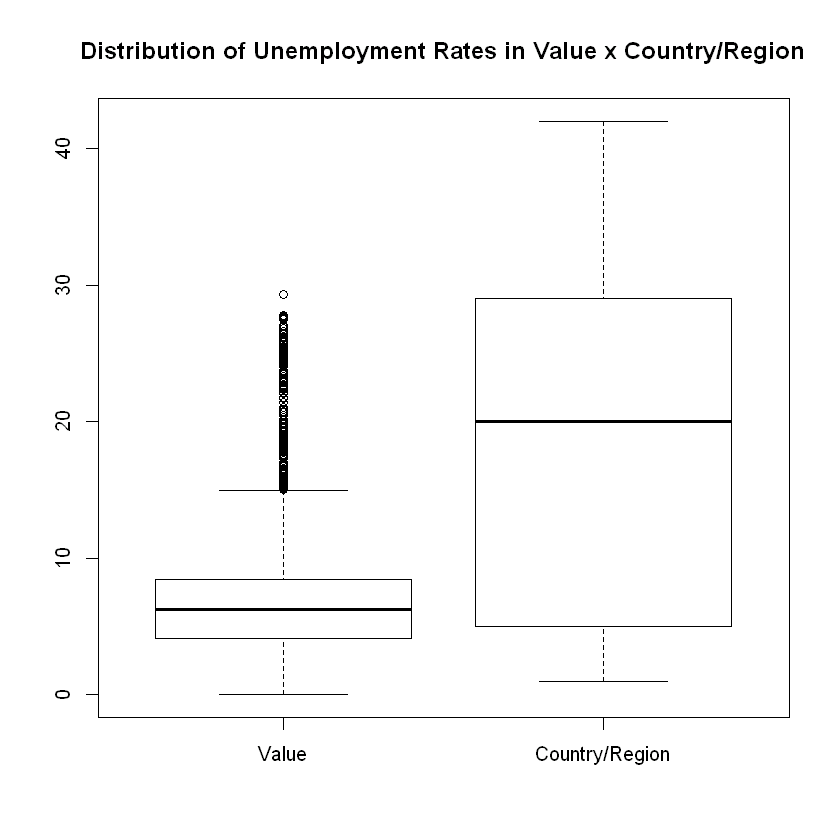

In [24]:
# Para responder a letra a, crio um novo data frame em que a coluna Location possui dados do tipo factor
valorxPais <- transform(desempregoDados, Location = as.factor(Location))

# Uso boxplot passando as colunas Value e Location
# Obs.: a função não aceita valores character, por isso passei Location para factor
boxplot(valorxPais$Value, valorxPais$Location,
        main="Distribution of Unemployment Rates in Value x Country/Region", names=c("Value", "Country/Region"))

In [25]:
# Para responder a letra b, uso um temporário para poder extrair um subgrupo contendo apenas dados da primeira região/país
temp <- subset(desempregoDados, locais[1] == desempregoDados$Location)

# Usando o temporário, gero o data frame contendo a amplitude da taxa da primeira região/país
taxa <- data.frame(Location = locais[1], Amplitude = (max(temp$Value) - min(temp$Value)))

# Uso for para achar o restante dos dados para as regiões/países que faltam
# Obs.1: Anteriormente vi que há 42 registros de países/regiões, logo sei o limite de repetições
# Obs.2: Comecei extraindo dados para o data frame fora da repetição pois preciso que tenham dados para usar o rbind a seguir
for (i in 2:42) {

    temp <- subset(desempregoDados, locais[i] == desempregoDados$Location)
    temp <- data.frame(Location = locais[i], Amplitude = (max(temp$Value) - min(temp$Value)))
    
    taxa <- rbind(taxa, temp)
}

# Organizo os registros por ordem decrescente em Amplitude
taxa <- taxa[with(taxa, order(-Amplitude)), ]
rownames(taxa) <- seq(length=nrow(taxa))
taxa

# Pelo output abaixo, estão listadas cada região/país com sua respectiva amplitude

,Location,Amplitude
1,GRC,20.9001
2,ESP,18.22754
3,EST,14.36042
4,POL,13.28046
5,PRT,13.26605
6,IRL,11.89951
7,NZL,11.2
8,BRA,11.16821
9,DEU,11.09209
10,IDN,10.75


In [26]:
# Para responder a letra c, gero um subconjunto contendo a maior amplitude do data.frame criado antes
subset(taxa, Amplitude == max(taxa$Amplitude))

# Pelo output, vemos que GRC possui a maior amplitude

,Location,Amplitude
1,GRC,20.9001


# Gráficos

## Evolução das Taxas de Desemprego

Faça um gráfico de linhas representando a evolução das taxas de desemprego. As linhas correspondentes a
um país/região devem ser representadas em cor cinza (gray75), e a média da OECD em vermelho (darkred).

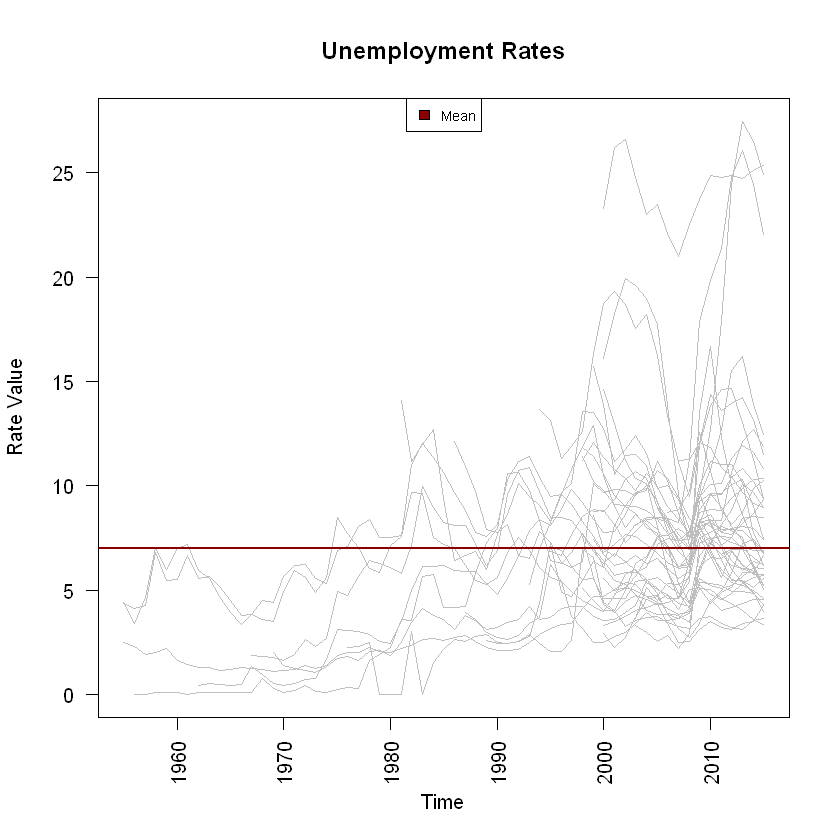

In [44]:
# Começo calculando menor e maior taxa para limitar um dos meus eixos
# Obs.: Usei o data frame contendo tempo puramente anual (sem quadrimestres e etc.) pois considerava NA dados não numéricos
# ao usar plot
taxaMin <- min(ddAnos$Value)
taxaMax <- max(ddAnos$Value)

# Inicializa o gráfico
plot(ddAnos$Time, ddAnos$Value, main = "Unemployment Rates", las = 2,
     type = "n", xlab = "Time", ylab = "Rate Value", ylim = c(taxaMin, taxaMax))

# Plotando linha de cada país/região
for (location in unique(ddAnos$Location)) {
    plotData <- ddAnos[ddAnos$Location == location, ]
    lines(plotData$Time, plotData$Value, col = "gray75")
}

# Plotando a linha da média de todos os dados coletados no data frame que usei
media <- mean(ddAnos$Value)
abline(h = media, col = "darkred", lwd = 2, lty = 1)
legend("top", legend = "Mean", fill = "darkred", border = "black", cex = 0.7)

# Pelo output, é visível algumas linhas começando muito depois, a lista montada umas questões antes usando o mesmo
# data frame mostra que há regiões que só começaram a ser registradas muito tempo após outras

## Países com maior amplitude de variação

Elabore um gráfico de linhas com os 5 países com maior amplitude, cada qual com uma cor e com o nome do
país à direita de cada linha.

In [104]:
# Para começar, recalculo um data frame com as amplitudes baseadas nos dados contendo apenas tempo em anos (sem quadrimestre e etc.)
temp <- subset(ddAnos, locais[1] == ddAnos$Location)

# Usando o temporário, gero o data frame contendo a amplitude da taxa da primeira região/país
taxaIncomp <- data.frame(Location = locais[1], Amplitude = (max(temp$Value) - min(temp$Value)))

# Uso for para achar o restante dos dados para as regiões/países que faltam
# Obs.1: Anteriormente vi que há 42 registros de países/regiões, logo sei o limite de repetições
# Obs.2: Comecei extraindo dados para o data frame fora da repetição pois preciso que tenham dados para usar o rbind a seguir
for (i in 2:42) {

    temp <- subset(ddAnos, locais[i] == ddAnos$Location)
    temp <- data.frame(Location = locais[i], Amplitude = (max(temp$Value) - min(temp$Value)))
    
    taxaIncomp <- rbind(taxaIncomp, temp)
}

# Organizo os registros por ordem decrescente em Amplitude
taxaIncomp <- taxaIncomp[with(taxaIncomp, order(-Amplitude)), ]

# Obs.: Refiz esta etapa, pois as amplitudes calculadas anteriormente usam todos os dados do arquivo e para gerar meu plot, uso
# apenas os dados contendo anos puros. Logo, os dados tem que coincidir da forma que foram organizados. Apesar que é possível
# perceber que os 5 países que estão no topo no data frame original, continuam na mesma posição no novo data frame
# só que com valores menores (como esperado)

,Location,Amplitude
1,GRC,19.70639
2,ESP,17.85992
3,POL,12.81172
4,PRT,12.17385
5,EST,12.11049


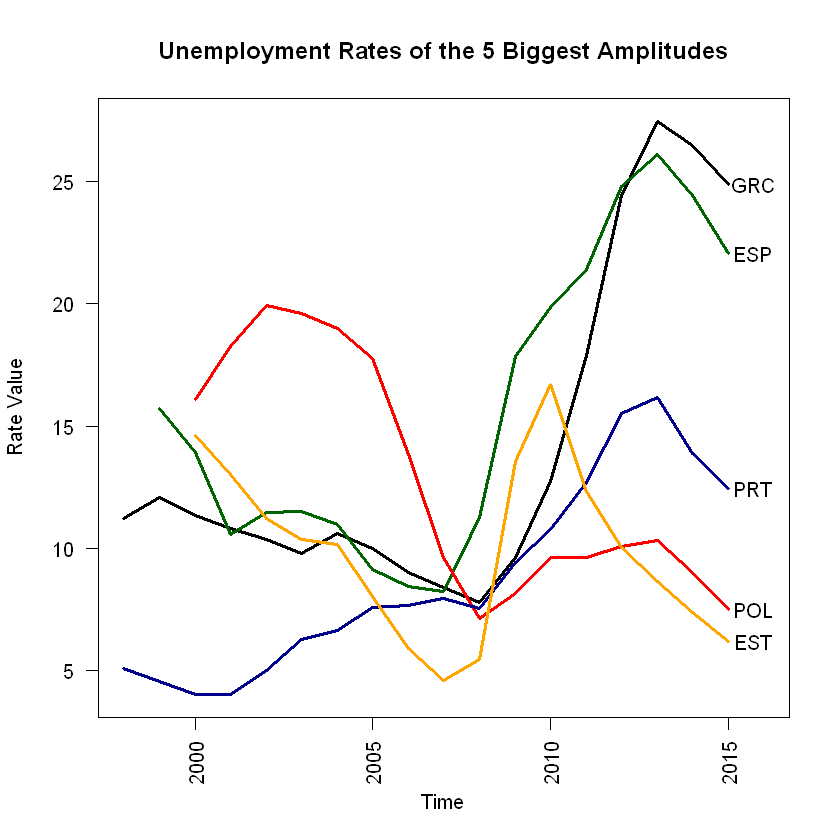

In [127]:
# Começo pegando os 5 locais de maior amplitude calculada anteriormente
cincoMaiores <- taxaIncomp[1:5, ]
rownames(cincoMaiores) <- seq(length=nrow(cincoMaiores))
cincoMaiores

tempLocal <- cincoMaiores$Location

# Pego o resto dos dados do meu data frame
# Obs.: Usei o data frame contendo tempo puramente anual (sem quadrimestres e etc.) pois considerava NA dados não numéricos
ddCinco <- subset(ddAnos, ddAnos$Location == tempLocal[1])

for(i in 2:5) {
    ddCinco <- rbind(ddCinco, subset(ddAnos, ddAnos$Location == tempLocal[i]))
}

# Calculo menor e maior taxa para limitar um dos meus eixos
taxaMin <- min(ddCinco$Value)
taxaMax <- max(ddCinco$Value)
anoMin <- min(ddCinco$Time)
anoMax <- max(ddCinco$Time)

# Inicializa o gráfico
plot(ddCinco$Time, ddCinco$Value, main = "Unemployment Rates of the 5 Biggest Amplitudes", las = 2,
     type = "n", xlab = "Time", ylab = "Rate Value", xlim= c(anoMin, anoMax + 1), ylim = c(taxaMin, taxaMax))

# Definindo cores de destaque para cada país/região
cores <- c("black", "darkgreen", "red", "darkblue", "orange")

# Uso uma variável de auxílio para índice dos vetores de cor, posições x e y (estes são para os nomes a colocar no plot)
# e nome do local
i <- 1
posX <- vector("numeric", length = 5)
posY <- vector("numeric", length = 5)
nomes <- vector("character", length = 5)

# Plotando linha de cada país/região
for (location in cincoMaiores$Location) {
    plotData <- ddCinco[ddCinco$Location == location, ]
    lines(plotData$Time, plotData$Value, col = cores[i], lwd = 3)
    
    # Calculando posição de cada nome a colocar no final da respectiva linha e guardando o nome do local
    anoMax <- max(plotData$Time)
    temp <- subset(plotData, plotData$Time == anoMax)
    posX[i] = anoMax + 0.7
    posY[i] = temp$Value
    nomes[i] = location
    i <- i + 1
}

# Colocando os nomes à direita de sua respectiva linha
text(posX, posY, labels = nomes)

## Países com Menor Variação

Elabore um gráfico de linhas com os 5 países com menor variação (excetuando-se a média da OECD), cada
qual com uma cor e com o nome do país à direita de cada linha.

,Location,Amplitude
1,CHE,0.512082
2,NOR,1.885311
3,BEL,1.953778
4,OECD,2.674617
5,LUX,3.002801


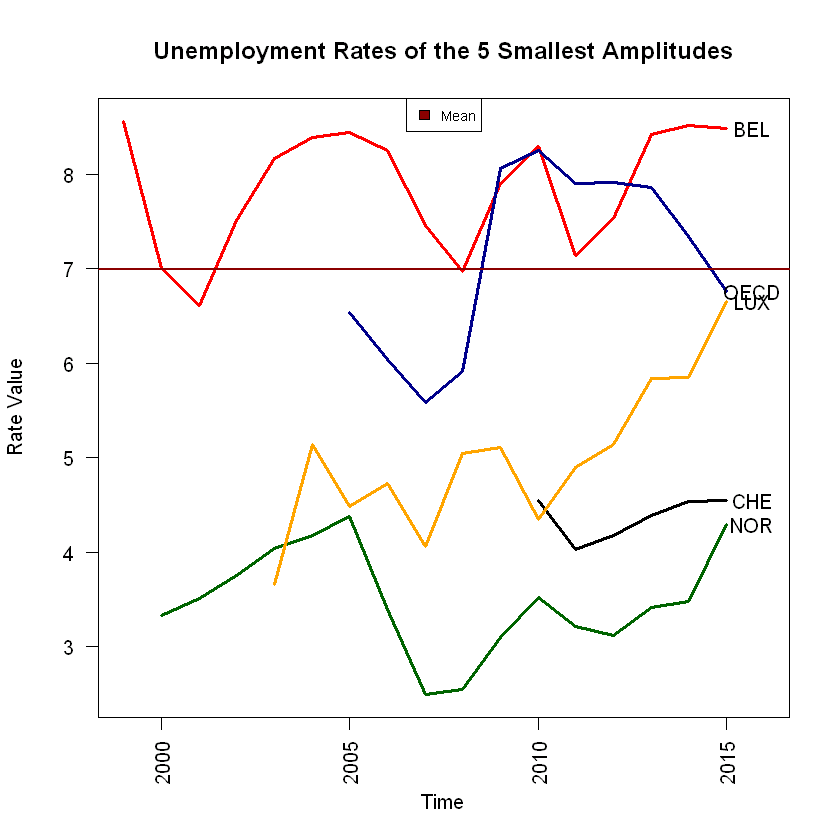

In [129]:
# Obs.: Aqui volto a usar o data frame contendo apenas anos puros
# Começo pegando os 5 locais de menor amplitude calculada anteriormente
temp <- taxaIncomp[with(taxaIncomp, order(Amplitude)), ]
cincoMenores <- temp[1:5, ]
rownames(cincoMenores) <- seq(length=nrow(cincoMenores))
cincoMenores

tempLocal <- cincoMenores$Location

# Pego o resto dos dados do meu data frame
# Obs.: Usei o data frame contendo tempo puramente anual (sem quadrimestres e etc.) pois considerava NA dados não numéricos
ddCinco <- subset(ddAnos, ddAnos$Location == tempLocal[1])

for(i in 2:5) {
    ddCinco <- rbind(ddCinco, subset(ddAnos, ddAnos$Location == tempLocal[i]))
}

# Calculo menor e maior taxa para limitar um dos meus eixos
taxaMin <- min(ddCinco$Value)
taxaMax <- max(ddCinco$Value)
anoMin <- min(ddCinco$Time)
anoMax <- max(ddCinco$Time)

# Inicializa o gráfico
plot(ddCinco$Time, ddCinco$Value, main = "Unemployment Rates of the 5 Smallest Amplitudes", las = 2,
     type = "n", xlab = "Time", ylab = "Rate Value", xlim= c(anoMin, anoMax + 1), ylim = c(taxaMin, taxaMax))

# Definindo cores de destaque para cada país/região
cores <- c("black", "darkgreen", "red", "darkblue", "orange")

# Uso uma variável de auxílio para índice dos vetores de cor, posições x e y (estes são para os nomes a colocar no plot)
# e nome do local
i <- 1
posX <- vector("numeric", length = 5)
posY <- vector("numeric", length = 5)
nomes <- vector("character", length = 5)

# Plotando linha de cada país/região
for (location in cincoMenores$Location) {
    plotData <- ddCinco[ddCinco$Location == location, ]
    lines(plotData$Time, plotData$Value, col = cores[i], lwd = 3)
    
    # Calculando posição de cada nome a colocar no final da respectiva linha
    anoMax <- max(plotData$Time)
    temp <- subset(plotData, plotData$Time == anoMax)
    posX[i] = anoMax + 0.7
    posY[i] = temp$Value
    nomes[i] = location
    i <- i + 1
}

# Colocando os nomes à direita de sua respectiva linha
text(posX, posY, labels = nomes)

# Plotando a linha da média de todos os dados coletados no data frame que usei
abline(h = media, col = "darkred", lwd = 2, lty = 1)
legend("top", legend = "Mean", fill = "darkred", border = "black", cex = 0.7)